# Analysis Project on Data : Global Conflict Hashtag on Social Media
- **Linkedin :** Muhammad Aditya Bayhaqie
- **Email :** adityabayhaqie@gmail.com
- **Github :** bayhaqieee

## Business Questions

- When is the Highest Posting time and Lowest Posting time for the Most Hashtag?
- Which Conflict shows a High Exposure on Hashtag?
- What Content Summary for each Tag?
- Which Hashtag has the Most Comments, Likes and Views? (separated)
- Which Higher Engagement of Social Media Used for sharing the Hashtags?

## Data Preparation

#### Importing Library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
import nltk
from wordcloud import WordCloud
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.corpus import stopwords

#### Assigning Data

In [3]:
data_df = pd.read_csv("Data/conflicts_hashtag_search.csv")
data_df.head()

,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
0,youtube,NaN,NaN,NaN,NaN,yemencivilwar,NaN,NaN
1,youtube,Russia-Ukraine Conflict: Putin Warns NATO Risk...,22.0,7.0,3069.0,russiaukraineconflict,CNN-News18,2024-09-13T16:23:39.000Z
2,youtube,LIVE: Russia Launches Waves of Drone Attacks o...,118.0,21.0,16358.0,russiaukraineconflict,Firstpost,2024-10-01T00:17:49.000Z
3,youtube,Russian Forces Take Over Ukraine's Avdiivka | ...,166.0,56.0,18054.0,russiaukraineconflict,CNBC-TV18,2024-02-19T15:37:34.000Z
4,youtube,Russia-Ukraine War: Ukraine's Surprise Attack ...,53.0,4.0,6096.0,russiaukraineconflict,DD India,2024-08-24T13:36:51.000Z


**Insight:**
- There is in Total 1 Datasets Containing
    - fromSocial
        - Referred to which social media the posting being post
    - text
        - The Headline
    - likesCount
        - Numbers of Likes
    - commentsCount
        - Numbers of Comments
    - viewsCount
        - Numbers of Views
    - input
        - Hashtag (**PRIMARY**)
    - authorMeta/name
        - The Posters
    - creationDate
        - The Date of the Postings Created

## Data Assessment

### Assessing Data

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       2546 non-null   object 
 1   text             2543 non-null   object 
 2   likesCount       2545 non-null   float64
 3   commentsCount    2545 non-null   float64
 4   viewsCount       321 non-null    float64
 5   input            2546 non-null   object 
 6   authorMeta/name  2483 non-null   object 
 7   creationDate     2545 non-null   object 
dtypes: float64(3), object(5)
memory usage: 159.3+ KB


In [5]:
data_df.isna().sum()

fromSocial            0
text                  3
likesCount            1
commentsCount         1
viewsCount         2225
input                 0
authorMeta/name      63
creationDate          1
dtype: int64

In [6]:
data_df[['likesCount','commentsCount','viewsCount']].describe()

,likesCount,commentsCount,viewsCount
count,2545.000000,2545.000000,3.210000e+02
mean,712.897839,148.247544,2.522169e+05
std,7323.585293,2475.833944,1.023982e+06
min,-1.000000,0.000000,7.300000e+01
25%,1.000000,0.000000,5.106000e+03
50%,8.000000,0.000000,2.165300e+04
75%,98.000000,3.000000,7.837800e+04
max,219000.000000,91917.000000,1.122714e+07


In [9]:
minus_likes = data_df[data_df['likesCount'] == -1]

minus_likes.info()
minus_likes.head()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 53 to 2449
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       96 non-null     object 
 1   text             96 non-null     object 
 2   likesCount       96 non-null     float64
 3   commentsCount    96 non-null     float64
 4   viewsCount       0 non-null      float64
 5   input            96 non-null     object 
 6   authorMeta/name  96 non-null     object 
 7   creationDate     96 non-null     object 
dtypes: float64(3), object(5)
memory usage: 6.8+ KB


,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
53,instagram,"On October 7, 2023, Israel faced an unexpected...",-1.0,1.0,NaN,israelpalestineconflict,The Indian Netizens,2024-10-07T08:10:50.000Z
57,instagram,🕯️ 🕊️\n.\n.\n.\n.\n#peacebuilding #conflictres...,-1.0,13.0,NaN,israelpalestineconflict,Amir Sommer,2024-10-07T05:39:41.000Z
135,instagram,"🕌 De acordo com a imprensa internacional, os H...",-1.0,0.0,NaN,yemencivilwar,"Conversas com a História | Guerras, História e...",2024-01-05T17:31:40.000Z
136,instagram,#freepalestine🇵🇸 #freecongo🇨🇩 #freesudan🇸🇩 #fr...,-1.0,0.0,NaN,yemencivilwar,Laila Imani,2023-11-15T00:18:27.000Z
138,instagram,#freepalestine🇵🇸 #freecongo🇨🇩 #freesudan🇸🇩 #fr...,-1.0,0.0,NaN,yemencivilwar,Laila Imani,2023-11-15T00:15:44.000Z


In [10]:
max_likes = data_df[data_df['likesCount'] == 219000]

max_likes.info()
max_likes.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 269 to 269
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       1 non-null      object 
 1   text             1 non-null      object 
 2   likesCount       1 non-null      float64
 3   commentsCount    1 non-null      float64
 4   viewsCount       1 non-null      float64
 5   input            1 non-null      object 
 6   authorMeta/name  1 non-null      object 
 7   creationDate     1 non-null      object 
dtypes: float64(3), object(5)
memory usage: 72.0+ bytes


,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
269,youtube,PART 2: Andrew Tate Talks Palestine and Israel...,219000.0,91917.0,9051874.0,israelpalestineconflict,Piers Morgan Uncensored,2023-11-21T21:00:04.000Z


**Insight:**
- A large number of Null Values on viewsCount
- Null Values in likesCount, commentsCount, text, authorMeta/Name,creationdate
- Several data containing -1 Likes from its posting while this thing is impossible 

## Data Cleaning

### Database Dataset

- **Issues :** 
    - Several data containing -1 Likes from its posting while this thing is impossible
    - Null Values in likesCount, commentsCount, text, authorMeta/Name,creationdate
    - A large number of Null Values on viewsCount
    - creationDate is not on *Datetime* format
- **Action :** 
    - Changing Data with -1 Likes to 0 Likes.
    - Data Dropping for likesCount, commentsCount, text, authorMeta/Name and creationdate dataset
    - Adding viewsCount by taking predicted amount based on likesCount and commentsCount
    - Converting creationDate to *Datetime* format

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       2546 non-null   object 
 1   text             2543 non-null   object 
 2   likesCount       2545 non-null   float64
 3   commentsCount    2545 non-null   float64
 4   viewsCount       321 non-null    float64
 5   input            2546 non-null   object 
 6   authorMeta/name  2483 non-null   object 
 7   creationDate     2545 non-null   object 
dtypes: float64(3), object(5)
memory usage: 159.3+ KB


In [12]:
minus_likes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 53 to 2449
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       96 non-null     object 
 1   text             96 non-null     object 
 2   likesCount       96 non-null     float64
 3   commentsCount    96 non-null     float64
 4   viewsCount       0 non-null      float64
 5   input            96 non-null     object 
 6   authorMeta/name  96 non-null     object 
 7   creationDate     96 non-null     object 
dtypes: float64(3), object(5)
memory usage: 6.8+ KB


In [13]:
data_df['likesCount'] = data_df['likesCount'].replace(-1, 0)

In [15]:
minus_likes = data_df[data_df['likesCount'] == -1]
minus_likes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       0 non-null      object 
 1   text             0 non-null      object 
 2   likesCount       0 non-null      float64
 3   commentsCount    0 non-null      float64
 4   viewsCount       0 non-null      float64
 5   input            0 non-null      object 
 6   authorMeta/name  0 non-null      object 
 7   creationDate     0 non-null      object 
dtypes: float64(3), object(5)
memory usage: 0.0+ bytes


In [23]:
data_df.isna().sum()

fromSocial            0
text                  3
likesCount            1
commentsCount         1
viewsCount         2225
input                 0
authorMeta/name      63
creationDate          1
dtype: int64

In [27]:
data_df = data_df.dropna(subset=['likesCount', 'commentsCount', 'text', 'authorMeta/name', 'creationDate'])

print("Number of rows after dropping:", data_df.shape[0])

Number of rows after dropping: 2481


In [28]:
data_df.isna().sum()

fromSocial            0
text                  0
likesCount            0
commentsCount         0
viewsCount         2160
input                 0
authorMeta/name       0
creationDate          0
dtype: int64

#### viewsCount Prediction using Linear Regression

In [29]:
# a. Data with non-null viewsCount
train_df = data_df.dropna(subset=['viewsCount'])

# b. Data with null viewsCount (this is the data we want to predict)
predict_df = data_df[data_df['viewsCount'].isnull()]

In [30]:
X_train = train_df[['likesCount', 'commentsCount']]
y_train = train_df['viewsCount']

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
X_predict = predict_df[['likesCount', 'commentsCount']]

In [33]:
predicted_views = model.predict(X_predict)

In [34]:
data_df.loc[data_df['viewsCount'].isnull(), 'viewsCount'] = predicted_views

In [35]:
print(data_df[['likesCount', 'commentsCount', 'viewsCount']].head())

   likesCount  commentsCount  viewsCount
1        22.0            7.0      3069.0
2       118.0           21.0     16358.0
3       166.0           56.0     18054.0
4        53.0            4.0      6096.0
5       838.0          464.0    146207.0


In [36]:
data_df.isna().sum()

fromSocial         0
text               0
likesCount         0
commentsCount      0
viewsCount         0
input              0
authorMeta/name    0
creationDate       0
dtype: int64

In [37]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2481 entries, 1 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       2481 non-null   object 
 1   text             2481 non-null   object 
 2   likesCount       2481 non-null   float64
 3   commentsCount    2481 non-null   float64
 4   viewsCount       2481 non-null   float64
 5   input            2481 non-null   object 
 6   authorMeta/name  2481 non-null   object 
 7   creationDate     2481 non-null   object 
dtypes: float64(3), object(5)
memory usage: 174.4+ KB


In [38]:
data_df['creationDate'] = pd.to_datetime(data_df['creationDate'])

C:\Users\adity\AppData\Local\Temp\ipykernel_23492\3177945455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['creationDate'] = pd.to_datetime(data_df['creationDate'])


In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2481 entries, 1 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   fromSocial       2481 non-null   object             
 1   text             2481 non-null   object             
 2   likesCount       2481 non-null   float64            
 3   commentsCount    2481 non-null   float64            
 4   viewsCount       2481 non-null   float64            
 5   input            2481 non-null   object             
 6   authorMeta/name  2481 non-null   object             
 7   creationDate     2481 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 174.4+ KB


## Exploratory Data Analysis (EDA)

#### Explore Datasets

In [40]:
data_df.describe(include="all")

,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
count,2481,2481,2481.000000,2481.000000,2.481000e+03,2481,2481,2481
unique,2,2400,NaN,NaN,NaN,3,992,NaN
top,instagram,"I have Palestinian and Israeli friends, and I'...",NaN,NaN,NaN,russiaukraineconflict,Muslim Lives Matter,NaN
freq,2160,8,NaN,NaN,NaN,1236,141,NaN
mean,NaN,NaN,729.892785,152.044337,1.026720e+05,NaN,NaN,2024-03-26 05:13:42.097138432+00:00
min,NaN,NaN,0.000000,0.000000,7.300000e+01,NaN,NaN,2020-07-14 20:32:50+00:00
25%,NaN,NaN,1.000000,0.000000,7.481603e+04,NaN,NaN,2024-05-12 15:51:57+00:00
50%,NaN,NaN,8.000000,0.000000,7.495133e+04,NaN,NaN,2024-07-26 05:30:42+00:00
75%,NaN,NaN,101.000000,4.000000,7.633816e+04,NaN,NaN,2024-09-01 10:54:34+00:00
max,NaN,NaN,219000.000000,91917.000000,1.122714e+07,NaN,NaN,2024-10-07 15:15:26+00:00


**Correlation Matrix between likes, comments and views**

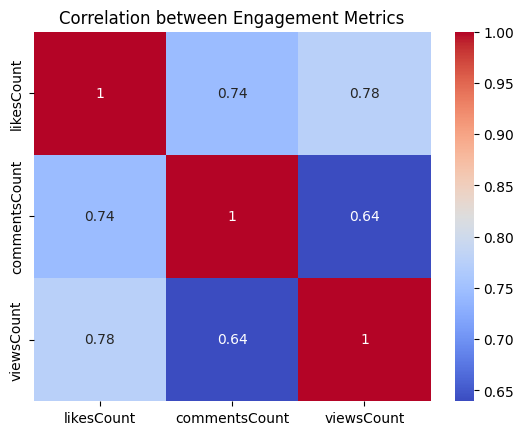

In [41]:
corr_matrix = data_df[['likesCount', 'commentsCount', 'viewsCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Engagement Metrics")
plt.show()

**Data Conclusion:**
- From the data, we can conclude that each of data have a quite strong correlation to each other, so i can conclude every likes, comments and view can affect each others

**Text Frequency**

In [47]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
text_data = ' '.join(data_df['text'].fillna('').apply(lambda x: re.sub(r'[^\w\s]', '', x.lower())))

In [48]:
filtered_words = [word for word in text_data.split() if word not in stop_words]

In [52]:
word_freq = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_freq)

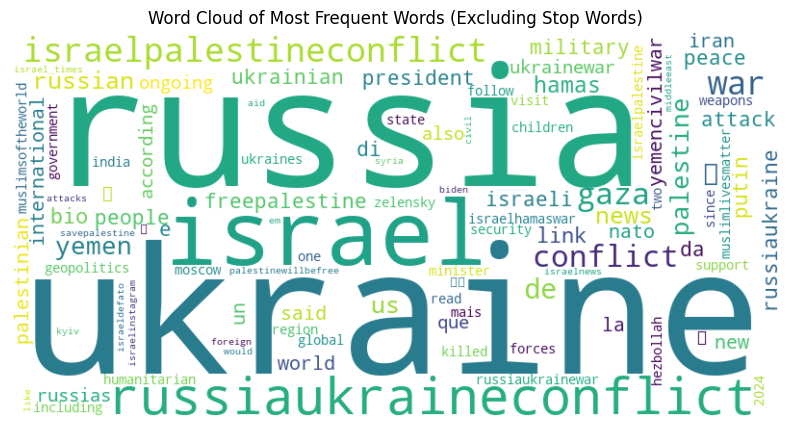

In [53]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words (Excluding Stop Words)")
plt.show()

**Data Conclusion:**
- From the text frequency, the text that frequently showing is a Country name or the Conflict that happen currently, this also shows the focused discussion especially on Russia-Ukraine Conflict and Palestine-Israel Conflict(🍉)

**Post Activity over Time**

C:\Users\adity\AppData\Local\Temp\ipykernel_23492\2419492779.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df.set_index('creationDate').resample('M').size().plot(figsize=(10,6), title="Number of Posts Over Time")


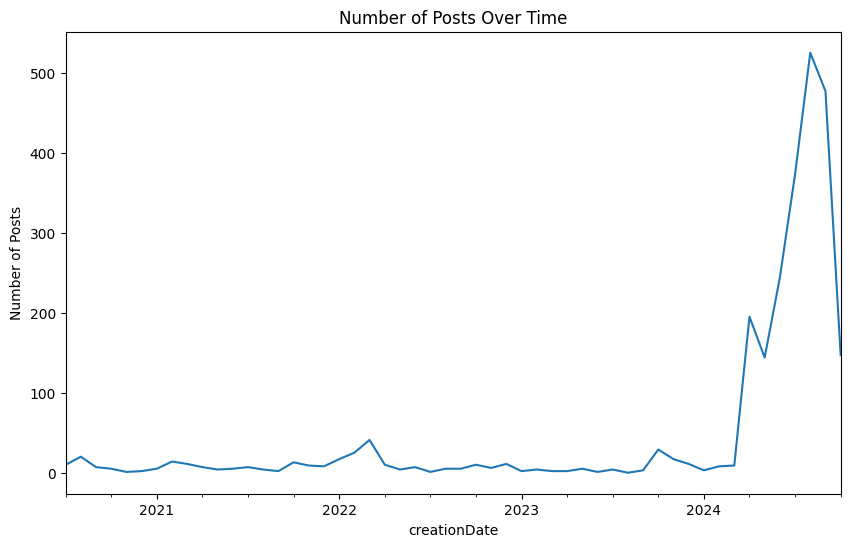

In [54]:
data_df.set_index('creationDate').resample('M').size().plot(figsize=(10,6), title="Number of Posts Over Time")
plt.ylabel('Number of Posts')
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_23492\731693108.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df.set_index('creationDate')[['likesCount', 'commentsCount', 'viewsCount']].resample('M').mean().plot(figsize=(10,6))


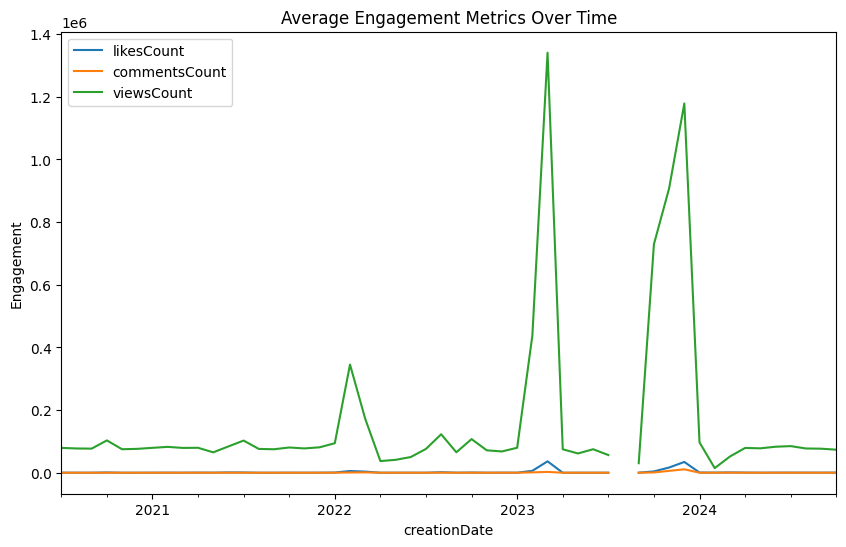

In [55]:
data_df.set_index('creationDate')[['likesCount', 'commentsCount', 'viewsCount']].resample('M').mean().plot(figsize=(10,6))
plt.title("Average Engagement Metrics Over Time")
plt.ylabel('Engagement')
plt.show()

**Data Conclusion:**
- The data shows several surge on postings related to the conflict, especially on the End of 2023, possibly due to October 7th Attacks 

## Visualization & Explanatory Analysis

#### 1st Question : When is the Highest Posting time and Lowest Posting time for the Most Hashtag?

**Step Method**
- Extract the Hour from creationDates
- Counting Hashtag on each post per Hour
- Group by Hour of Postings
- Finding Lowest and Highest Posting Hour
- Visualize it

C:\Users\adity\AppData\Local\Temp\ipykernel_23492\2313479492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['posting_hour'] = data_df['creationDate'].dt.hour
C:\Users\adity\AppData\Local\Temp\ipykernel_23492\2313479492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['hashtag_count'] = data_df['text'].apply(lambda x: x.count('#'))
C:\Users\adity\AppData\Local\Temp\ipykernel_23492\2313479492.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

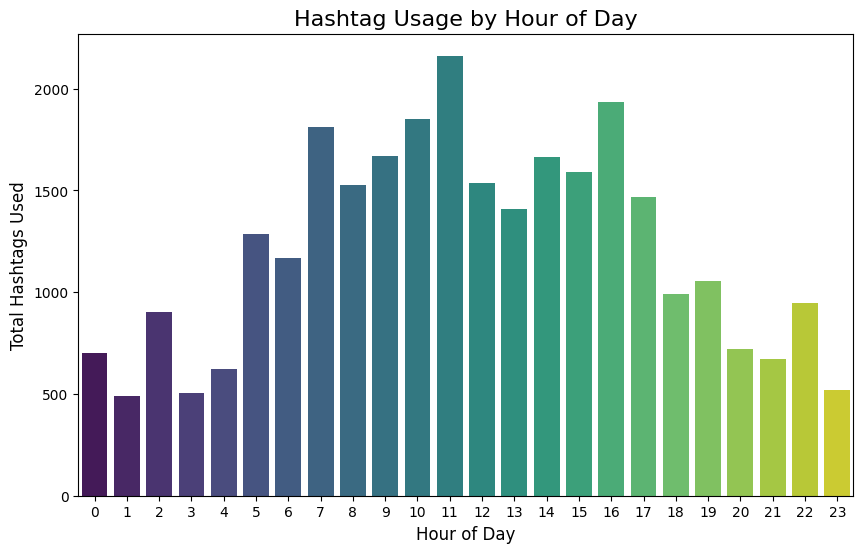

Highest Posting Time for Hashtags: 11:00
Lowest Posting Time for Hashtags: 1:00


In [57]:
# Extract the hour from creationDate
data_df['posting_hour'] = data_df['creationDate'].dt.hour

# Assuming hashtags are in the text column, count hashtags in each post
data_df['hashtag_count'] = data_df['text'].apply(lambda x: x.count('#'))

# Group by hour and sum hashtag counts
hourly_hashtag_usage = data_df.groupby('posting_hour')['hashtag_count'].sum()

# Find the highest and lowest posting times for hashtags
highest_posting_time = hourly_hashtag_usage.idxmax()
lowest_posting_time = hourly_hashtag_usage.idxmin()

# Plot hourly hashtag usage
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_hashtag_usage.index, y=hourly_hashtag_usage.values, palette="viridis")
plt.title('Hashtag Usage by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Hashtags Used', fontsize=12)
plt.show()

print(f"Highest Posting Time for Hashtags: {highest_posting_time}:00")
print(f"Lowest Posting Time for Hashtags: {lowest_posting_time}:00")

#### 2nd Question : Which Keywords shows a High Exposure on Hashtag?

In [59]:
text_data = ' '.join(data_df['text'].fillna('').apply(lambda x: re.sub(r'[^\w\s]', '', x.lower())))

In [60]:
filtered_words = [word for word in text_data.split() if word not in stop_words]

In [61]:
word_freq = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_freq)

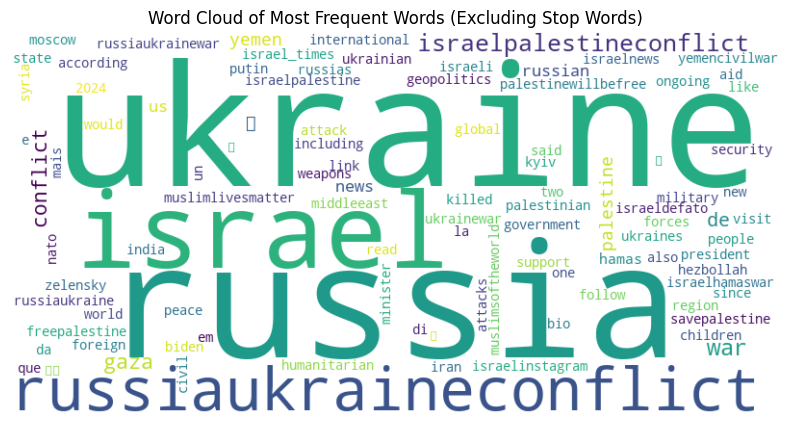

In [63]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words (Excluding Stop Words)")
plt.show()